In [1]:
#!pip install ewl

In [2]:
%matplotlib inline

In [3]:
from ewl import EWL
from ewl.ibmq import EWL_IBMQ
from ewl.parametrizations import U_theta_alpha_beta

import sympy as sp
from sympy import Array, Matrix
from sympy.physics.quantum.qubit import Qubit

from qiskit import IBMQ
from qiskit.visualization import plot_histogram

sp.init_printing()
IBMQ.load_account()

i = sp.I
pi = sp.pi
sqrt2 = sp.sqrt(2)

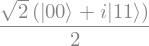

In [4]:
psi = (Qubit('00') + i * Qubit('11')) / sqrt2
psi

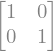

In [5]:
C = Matrix([
    [1, 0],
    [0, 1],
])
C

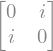

In [6]:
D = Matrix([
    [0, i],
    [i, 0],
])
D

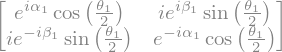

In [7]:
theta1, alpha1, beta1 = sp.symbols('theta1 alpha1 beta1', real=True)
alice = U_theta_alpha_beta(theta=theta1, alpha=alpha1, beta=beta1)
alice

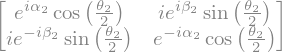

In [8]:
theta2, alpha2, beta2 = sp.symbols('theta2 alpha2 beta2', real=True)
bob = U_theta_alpha_beta(theta=theta2, alpha=alpha2, beta=beta2)
bob

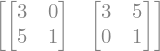

In [9]:
payoff_matrix = Array([
    [
        [3, 0],
        [5, 1],
    ],
    [
        [3, 5],
        [0, 1],
    ],
])
payoff_matrix

In [10]:
ewl = EWL(psi=psi, C=C, D=D, players=[alice, bob], payoff_matrix=payoff_matrix)
ewl

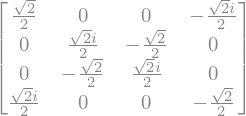

In [11]:
ewl.J

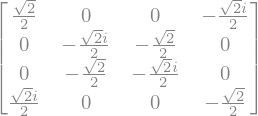

In [12]:
ewl.J_H

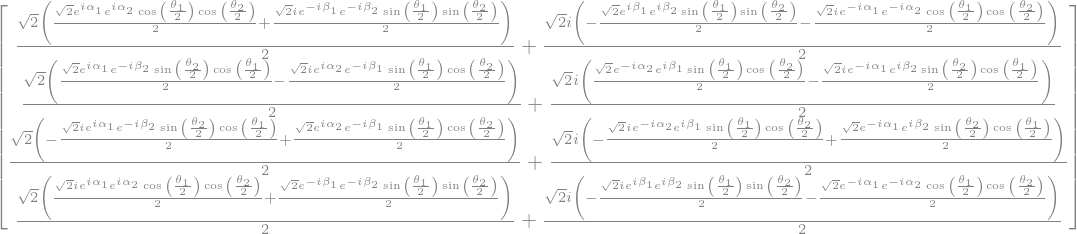

In [13]:
ewl.amplitudes(simplify=False)

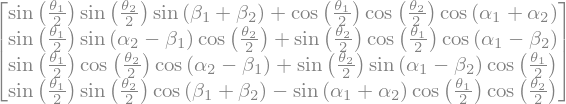

In [14]:
ewl.amplitudes()

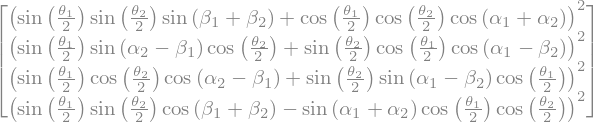

In [15]:
ewl.probs()

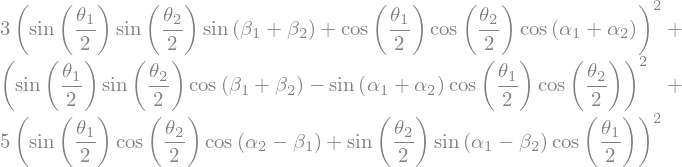

In [16]:
ewl.payoff_function(player=0)

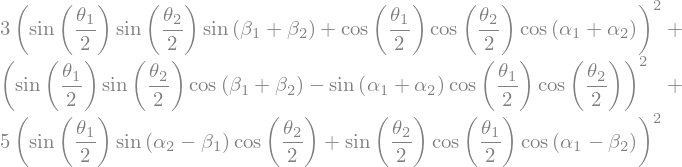

In [17]:
ewl.payoff_function(player=1)

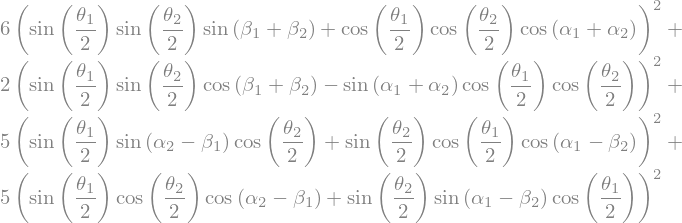

In [18]:
ewl.payoff_function(player=None)

In [19]:
ewl.params

In [20]:
ewl_fixed = ewl.fix(theta1=pi / 2, alpha1=pi / 2, beta1=0,
                    theta2=0, alpha2=0, beta2=0)

In [21]:
ewl_fixed.params

In [22]:
ewl_ibmq = EWL_IBMQ(ewl_fixed)
ewl_ibmq

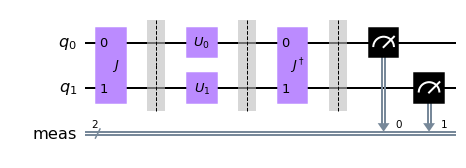

In [23]:
ewl_ibmq.draw()

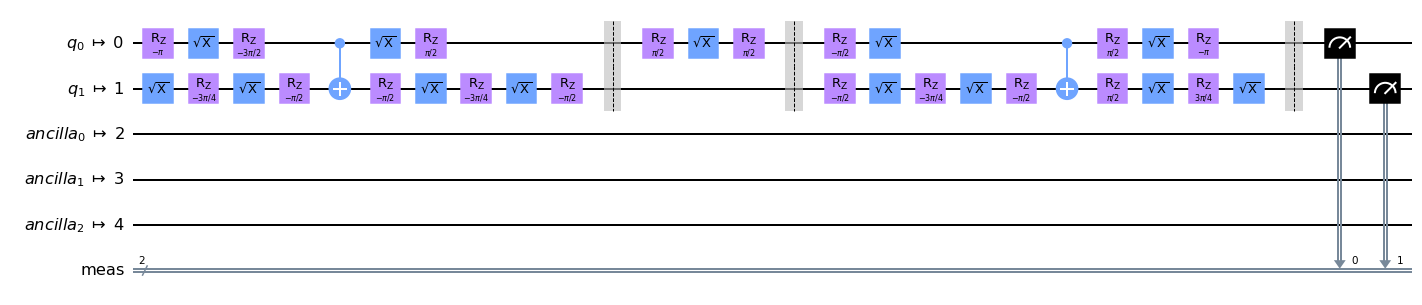

In [24]:
ewl_ibmq.draw_transpiled(backend_name='ibmq_quito', optimization_level=3, fold=-1)

{'01': 0.5, '11': 0.5}


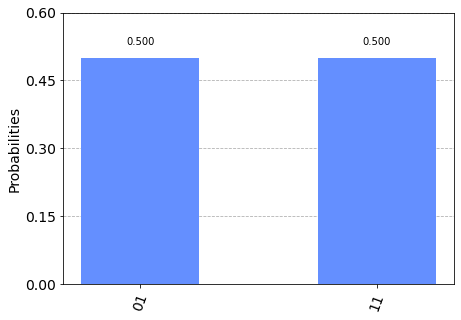

In [25]:
probs = ewl_ibmq.simulate_probs()
print(probs)
plot_histogram(probs)

{'01': 509, '11': 515}


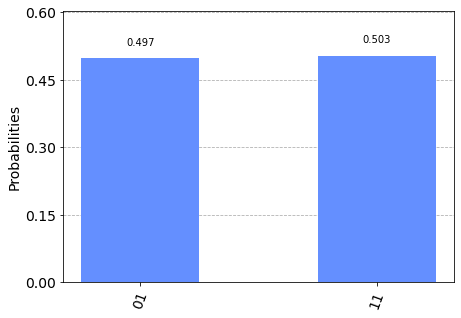

In [26]:
counts_qasm_simulator = ewl_ibmq.simulate_counts()
print(counts_qasm_simulator)
plot_histogram(counts_qasm_simulator)

Job Status: job has successfully run
{'00': 148, '01': 1756, '10': 218, '11': 1878}


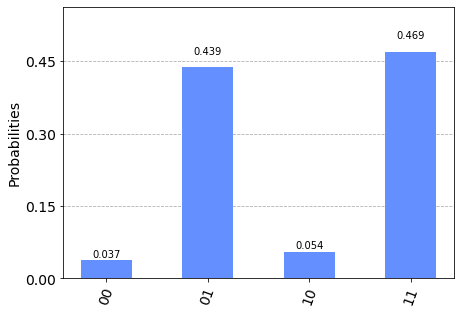

In [27]:
counts_quantum_device = ewl_ibmq.run()
print(counts_quantum_device)
plot_histogram(counts_quantum_device)

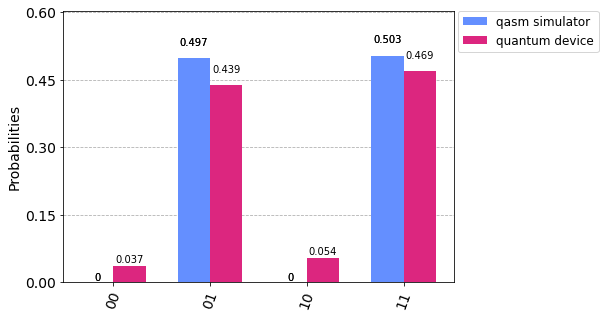

In [28]:
plot_histogram(data=[counts_qasm_simulator, counts_quantum_device],
               legend=['qasm simulator', 'quantum device'])